<a href="https://colab.research.google.com/github/SaurabhSRP/04-NLP-based-Projects/blob/main/Twitter%20Climate%20Change%20Sentiment/Twitter_Climate_Change_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
style.use("seaborn-poster")

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/SaurabhSRP/04-NLP-based-Projects/main/Twitter%20Climate%20Change%20Sentiment/twitter_sentiment_data.csv")
data.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


#**About this dataset**
This dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were annotated. Each tweet is labelled independently by 3 reviewers. This dataset only contains tweets that all 3 reviewers agreed on (the rest were discarded).

Each tweet is labelled as one of the following classes:

* 2(News): the tweet links to factual news about climate change
* 1(Pro): the tweet supports the belief of man-made climate change
* 0(Neutral: the tweet neither supports nor refutes the belief of man-made climate change
* -1(Anti): the tweet does not believe in man-made climate change

#**EDA**

In [3]:
df=data.copy()

In [4]:
sentiment={2:'News',1:"Pro",0:"Neutral",-1:"Anti"}
df['sentiment']=df['sentiment'].map(sentiment)
df.head()

,sentiment,message,tweetid
0,Anti,@tiniebeany climate change is an interesting h...,792927353886371840
1,Pro,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,Pro,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,Pro,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,News,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.patches.Wedge at 0x7f83ab6443d0>,
 [Text(-1.196992544097065, -0.08490494317786287, 'News'),
  Text(0.8648225142943446, -0.8319146703656621, 'Pro'),
  Text(1.0812025035296828, 0.5205777044410818, 'Neutral'),
  Text(0.33768237700868936, 1.1515079731629139, 'Anti')],
 [Text(-0.6982456507232878, -0.04952788352042, '52%'),
  Text(0.5044798000050343, -0.48528355771330284, '21%'),
  Text(0.630701460392315, 0.303670327590631, '18%'),
  Text(0.19698138658840209, 0.6717129843450329, '9%')])

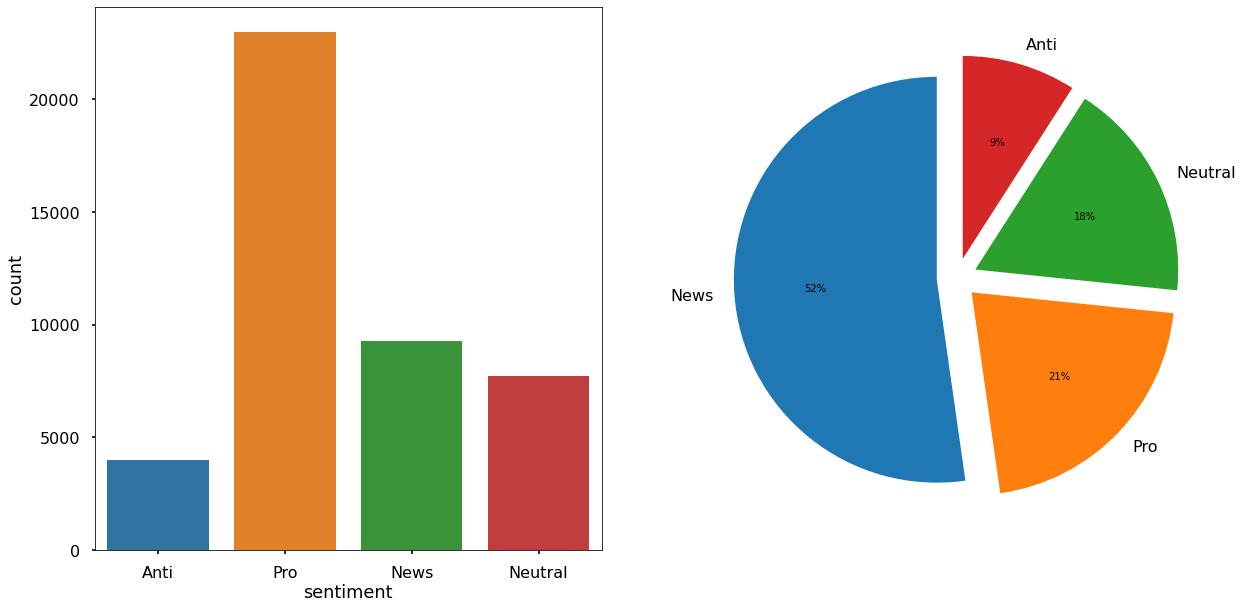

In [5]:
fig,axes=plt.subplots(1,2,figsize=(20,10))
sns.countplot(df['sentiment'],ax=axes[0])

labels = list(sentiment.values())

axes[1].pie(df["sentiment"].value_counts(),
            labels=labels,
            autopct="%1.0f%%",
            startangle=90,
            explode=tuple([0.1] * len(labels)))

##dataset is fairly imbalanced 

In [6]:
import re 
import nltk
from nltk.probability import FreqDist
import itertools

In [7]:
for word in df["message"]:
  hastags=re.findall(r"#(\w+)",word)


In [8]:
df["message"][2]

"Fabulous! Leonardo #DiCaprio's film on #climate change is brilliant!!! Do watch. https://t.co/7rV6BrmxjW via @youtube"

In [9]:
for word in df["message"][2]:
  hastags=re.findall(r'#(\w+)',word)

In [10]:
sentiment_grp=df.groupby('sentiment')

In [11]:
top15 = {}

for sentiment,group in sentiment_grp:
  hashtags=group["message"].apply(lambda tweet:re.findall(r"#(\w+)",tweet))
  hashtags=itertools.chain(*hashtags)
  hashtags = [ht.lower() for ht in hashtags]

  frequency = nltk.FreqDist(hashtags)
    
  df_hashtags = pd.DataFrame({
        "hashtags": list(frequency.keys()),
        "counts": list(frequency.values()),
    })
  top15_tags=df_hashtags.nlargest(15,columns=['counts'])

  top15[sentiment]=top15_tags.reset_index(drop=True)

display(pd.concat(top15, axis=1).head(n=10))
     

Anti               Neutral                  News         \
        hashtags counts       hashtags counts       hashtags counts   
0           tcot     59        climate     59        climate    330   
1           maga     31  climatechange     51  climatechange    171   
2        climate     25          trump     20           news     80   
3  climatechange     25  globalwarming     18    environment     77   
4          pjnet     23    debatenight     16          trump     49   
5          trump     21          cop21     14        science     42   
6  globalwarming     19         auspol     13  globalwarming     29   
7       fakenews     15          cop22     11          cop22     26   
8             p2     13        science      9             p2     22   
9       teaparty     11           maga      9          cop21     21   

               Pro         
          hashtags counts  
0          climate    541  
1    climatechange    384  
2   beforetheflood    265  
3     actonclimate    156  
4   parisagreement    108  
5  imvotingbecause     93  
6            cop22     86  
7           auspol     76  
8            cop21     73  
9    globalwarming     73

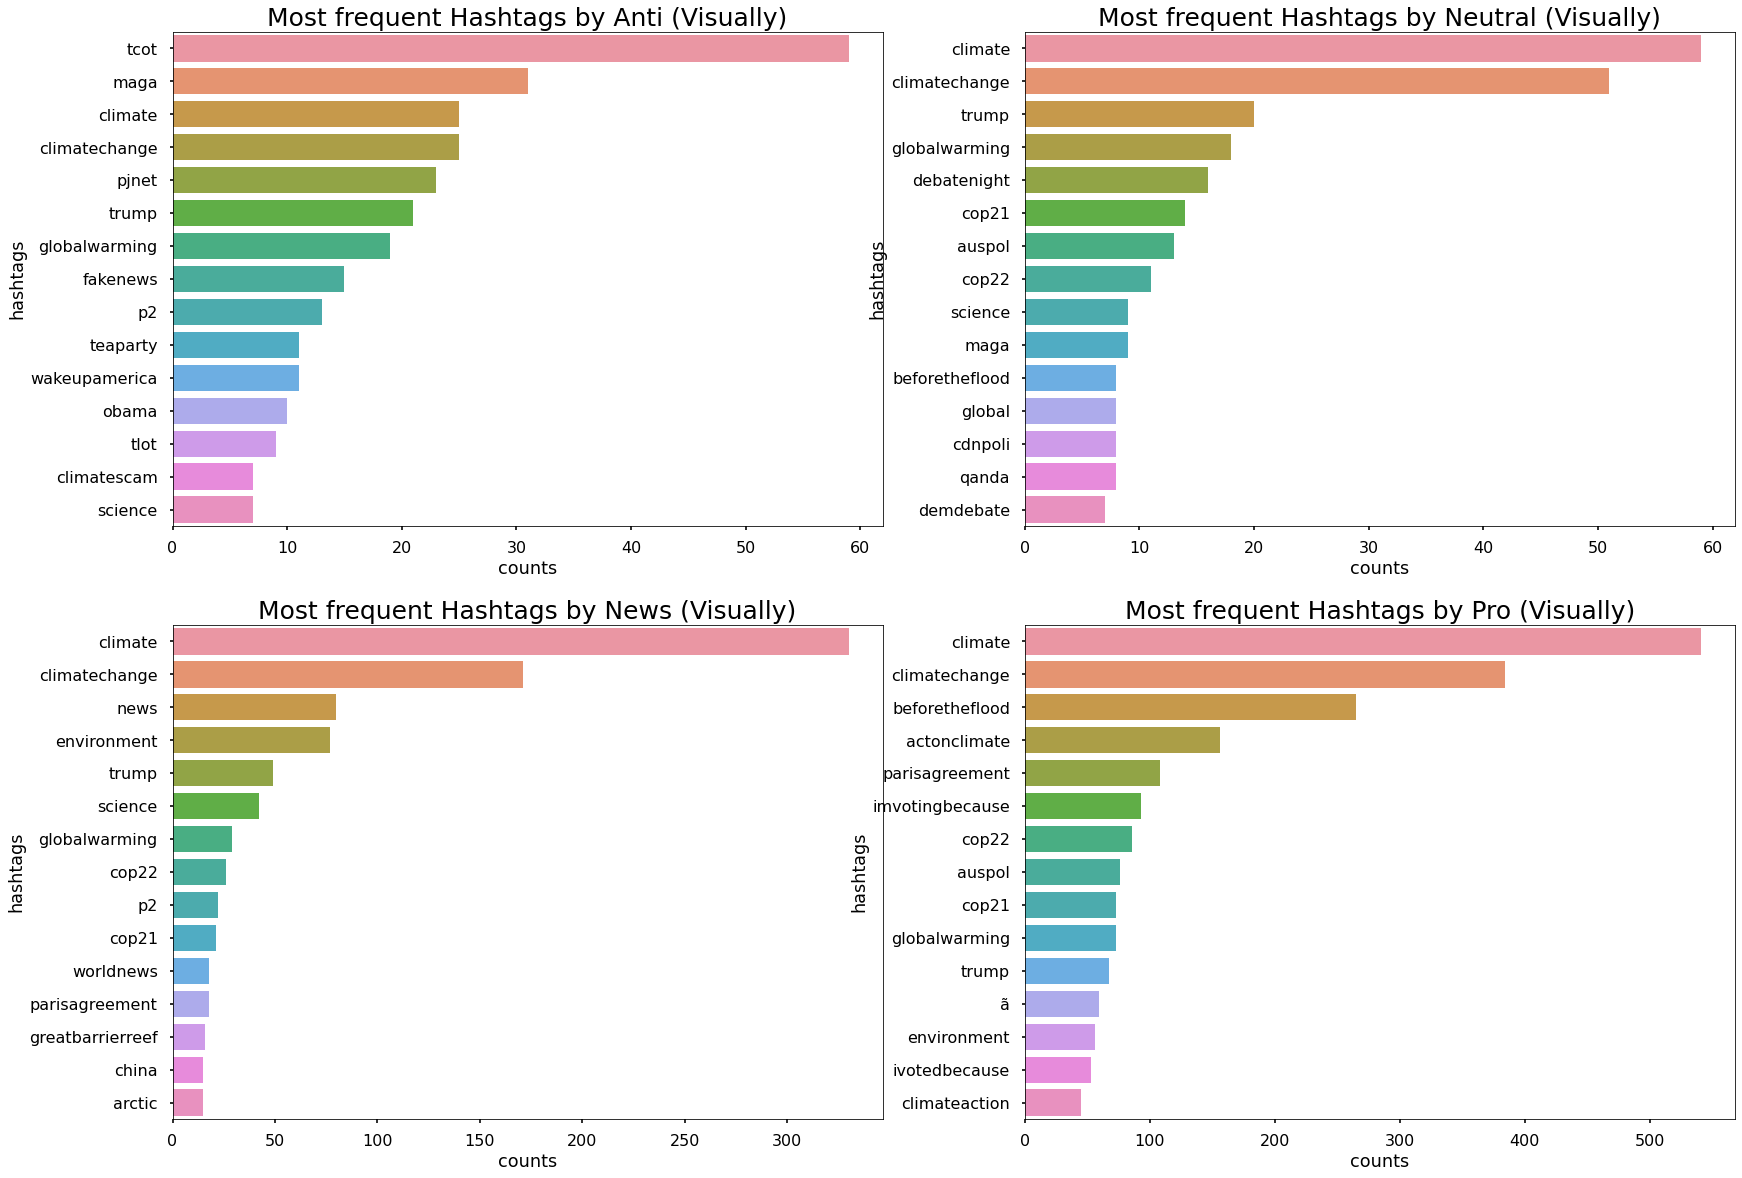

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(28, 20))
counter = 0

for sentiment, top in top15.items():
    sns.barplot(data=top, y="hashtags", x="counts", ax=axes[counter // 2, counter % 2])
    axes[counter // 2, counter % 2].set_title(f"Most frequent Hashtags by {sentiment} (Visually)", fontsize=25)
    counter += 1
plt.show()

In [13]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
corpus=[]
for i in range(len(data['message'])):
  tweet=re.sub('[^a-zA-Z]',' ',data['message'][i])
  tweet=re.sub(r"http(s?):\/\/.*\/\w*",' ',data['message'][i]) ##strip url
  tweet=re.sub(r"#\w*",' ',data['message'][i]) #strip hashtags
  tweet=re.sub(r"\d+",' ',data['message'][i]) #strip numeric values
  tweet=re.sub(r"U+FFFD",' ',data['message'][i]) #remove the 'character note present"diamond
  tweet=re.sub(r"@[\w]*",' ',data['message'][i])  # strip account mentions)
  tweet = re.sub(r"[,.;':@#?!\&/$]+\ *", " ", tweet)
  tweet=tweet.lower()
  tweet=tweet.split()

  tweet=[ps.stem(word) for word in tweet if not word in stopwords.words('english')]
  tweet=' '.join(tweet)
  corpus.append(tweet)

In [15]:
data["message"]=corpus

In [16]:
data=data

#**Independent and dependent feature**

In [17]:
X=data["message"]
y=data["sentiment"]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

#**Converting Word2Vec**

In [19]:
# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [20]:
tfdif=TfidfVectorizer()
X_train_vec=tfdif.fit_transform(X_train)
X_test_vec=tfdif.transform(X_test)

In [21]:
print(X_train_vec)

  (0, 17503)	0.3243211394343996
  (0, 8462)	0.048818566282723484
  (0, 16303)	0.04681005126508986
  (0, 7824)	0.03932611835274305
  (0, 8237)	0.03842948232755453
  (0, 14659)	0.1620076219946132
  (0, 26196)	0.21467916717056695
  (0, 32059)	0.24178285987182815
  (0, 35449)	0.2315275700991416
  (0, 4609)	0.12168742510368132
  (0, 13699)	0.1829122915983483
  (0, 13432)	0.19076196860509348
  (0, 12401)	0.2820684694183273
  (0, 10827)	0.24178285987182815
  (0, 14992)	0.4083724485475056
  (0, 7447)	0.3243211394343996
  (0, 26064)	0.18909401611745263
  (0, 7902)	0.2963936436452742
  (0, 31499)	0.29083669066898976
  (1, 32135)	0.41246017199263224
  (1, 33122)	0.43687380259742464
  (1, 24435)	0.34310348547016173
  (1, 20349)	0.3173544245958108
  (1, 23133)	0.3604327612747085
  (1, 35282)	0.17679129423244708
  :	:
  (30758, 37167)	0.23977254402558246
  (30758, 35329)	0.2757595725166115
  (30758, 35457)	0.2589932715541213
  (30758, 28136)	0.2766999510156895
  (30758, 29494)	0.22547623085007226
  

#**Random Forest Classifier**

In [22]:
rf=RandomForestClassifier()
model_rf=rf.fit(X_train_vec,y_train)

In [23]:
pred_rf=model_rf.predict(X_test_vec)

              precision    recall  f1-score   support

          -1       0.85      0.24      0.37      1190
           0       0.61      0.36      0.45      2317
           1       0.67      0.91      0.77      6873
           2       0.76      0.58      0.66      2803

    accuracy                           0.68     13183
   macro avg       0.72      0.52      0.56     13183
weighted avg       0.69      0.68      0.65     13183

0.6801941894864598


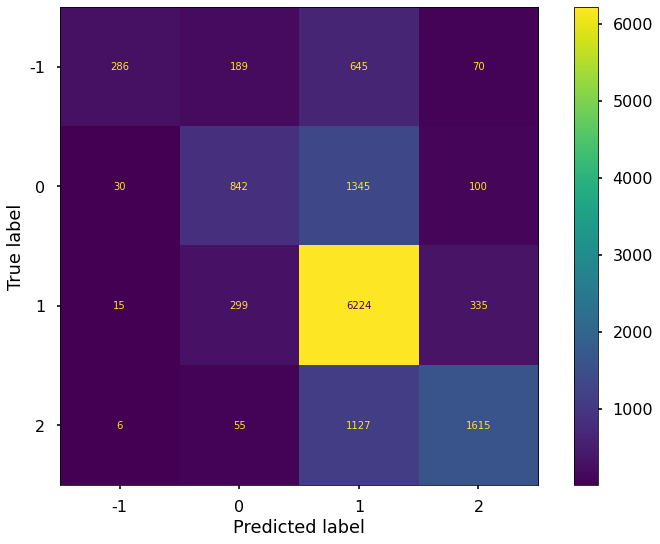

In [50]:
print(classification_report(y_test,pred_rf))
print(accuracy_score(y_test,pred_rf))
ConfusionMatrixDisplay.from_estimator(model_rf,X_test_vec,y_test)

#**Naive Bayes Classification**

In [25]:
nb=MultinomialNB()

In [26]:
model_nb=nb.fit(X_train_vec,y_train)

In [27]:
pred_nb=model_nb.predict(X_test_vec)

              precision    recall  f1-score   support

          -1       0.93      0.01      0.02      1190
           0       0.97      0.05      0.10      2317
           1       0.55      1.00      0.71      6873
           2       0.90      0.20      0.32      2803

    accuracy                           0.57     13183
   macro avg       0.84      0.31      0.29     13183
weighted avg       0.73      0.57      0.46     13183

0.5713418796935447


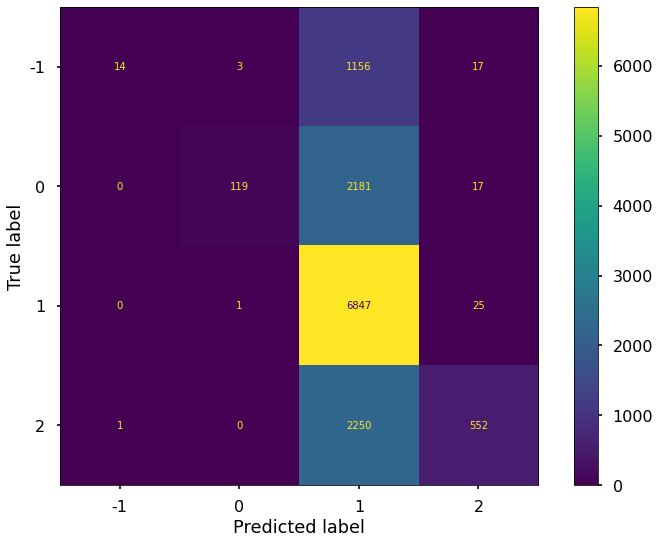

In [51]:
print(classification_report(y_test,pred_nb))
print(accuracy_score(y_test,pred_nb))
ConfusionMatrixDisplay.from_estimator(model_nb,X_test_vec,y_test)

#**K-nearest-neighbour**

In [29]:
knn = KNeighborsClassifier()

In [30]:
model_knn=knn.fit(X_train_vec,y_train)

In [31]:
pred_knn=model_knn.predict(X_test_vec)

              precision    recall  f1-score   support

          -1       0.46      0.40      0.42      1190
           0       0.38      0.55      0.45      2317
           1       0.71      0.68      0.70      6873
           2       0.70      0.54      0.61      2803

    accuracy                           0.60     13183
   macro avg       0.56      0.54      0.54     13183
weighted avg       0.63      0.60      0.61     13183

0.6041113555336418


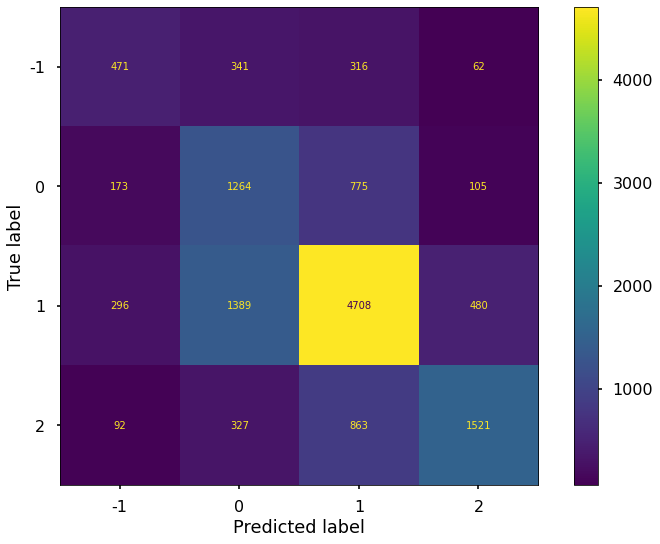

In [52]:
print(classification_report(y_test,pred_knn))
print(accuracy_score(y_test,pred_knn))
ConfusionMatrixDisplay.from_estimator(model_knn,X_test_vec,y_test)

#**logistic Regression**

In [33]:
log=LogisticRegression()

In [34]:
model_log=log.fit(X_train_vec,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
pred_log=model_log.predict(X_test_vec)

              precision    recall  f1-score   support

          -1       0.74      0.39      0.51      1190
           0       0.64      0.39      0.48      2317
           1       0.73      0.85      0.79      6873
           2       0.68      0.76      0.72      2803

    accuracy                           0.71     13183
   macro avg       0.70      0.60      0.63     13183
weighted avg       0.71      0.71      0.69     13183

0.7103087309413639


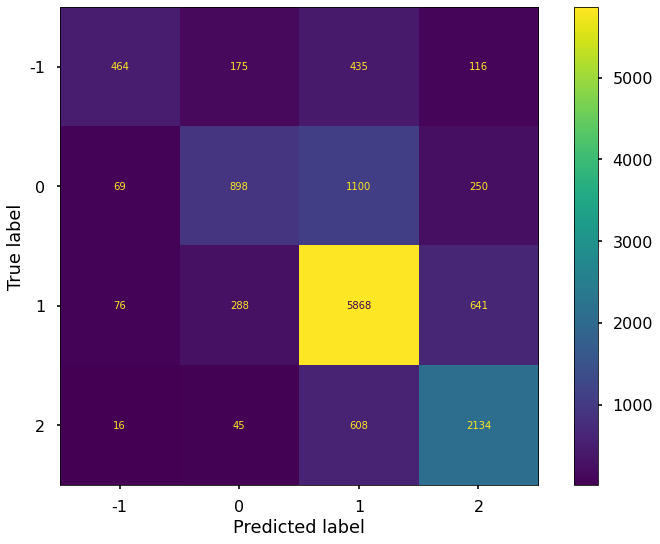

In [47]:
print(classification_report(y_test,pred_log))
print(accuracy_score(y_test,pred_log))
ConfusionMatrixDisplay.from_estimator(model_log,X_test_vec,y_test)

#**Support Vector Machines**

In [37]:
svm= LinearSVC()

In [38]:
model_svm=svm.fit(X_train_vec,y_train)

In [39]:
pred_svm=model_svm.predict(X_test_vec)

              precision    recall  f1-score   support

          -1       0.67      0.48      0.56      1190
           0       0.61      0.42      0.49      2317
           1       0.75      0.83      0.79      6873
           2       0.68      0.77      0.72      2803

    accuracy                           0.71     13183
   macro avg       0.68      0.62      0.64     13183
weighted avg       0.70      0.71      0.70     13183

0.7119775468406281


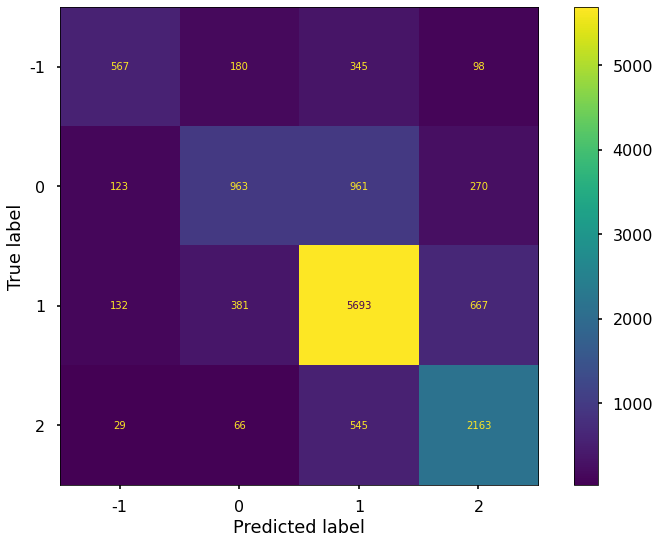

In [46]:
print(classification_report(y_test,pred_svm))
print(accuracy_score(y_test,pred_svm))
ConfusionMatrixDisplay.from_estimator(model_svm,X_test_vec,y_test)

#This been my first NLP based project, drop comments on improving and increasing the accuracy